<center><h1>Лабораторна робота №4</h1>
<h2>Структури для роботи з великими обсягами даних в Python</h2>
<h3>Роботу виконав студент групи ФБ-24 Синеуцький Олександр</h3></center>

<center><h3>Завдання першого рівня</h3></center>
<h4>Виконати всі завдання, використовуючи як numpy array, так і dataframe, проаналізувати часові витрати на виконання процедур
, зробити висновки щодо ситуацій, в яких має сенс віддати перевагу тій чи іншій структурі даних.</h4>

In [1]:
from datetime import time as dt_time
import pandas as pd
import numpy as np
import time

def pddf():
    df_pd = pd.read_csv("household_power_consumption.txt", sep=";", low_memory=False, na_values='?')
    df_pd['Date'] = pd.to_datetime(df_pd['Date'], dayfirst=True)
    df_pd['Time'] = pd.to_datetime(df_pd['Time'], format='%H:%M:%S').dt.time
    df_pd = df_pd.dropna()
    return df_pd

def npdf():
    df_np = pd.read_csv("household_power_consumption.txt", sep=";", low_memory=False, na_values='?')
    df_np['Date'] = pd.to_datetime(df_np['Date'], dayfirst=True)
    df_np['Time'] = pd.to_datetime(df_np['Time'], format='%H:%M:%S').dt.time
    df_np = df_np.dropna()
    df_np = df_np.to_numpy()
    return df_np

print(pddf())
#print(npdf())
dfpd = pddf()
dfnp = npdf()

              Date      Time  Global_active_power  Global_reactive_power  \
0       2006-12-16  17:24:00                4.216                  0.418   
1       2006-12-16  17:25:00                5.360                  0.436   
2       2006-12-16  17:26:00                5.374                  0.498   
3       2006-12-16  17:27:00                5.388                  0.502   
4       2006-12-16  17:28:00                3.666                  0.528   
...            ...       ...                  ...                    ...   
2075254 2010-11-26  20:58:00                0.946                  0.000   
2075255 2010-11-26  20:59:00                0.944                  0.000   
2075256 2010-11-26  21:00:00                0.938                  0.000   
2075257 2010-11-26  21:01:00                0.934                  0.000   
2075258 2010-11-26  21:02:00                0.932                  0.000   

         Voltage  Global_intensity  Sub_metering_1  Sub_metering_2  \
0         234.84 

<h4>1. Обрати всі домогосподарства, у яких загальна активна споживана потужність перевищує 5 кВт.</h4>

In [2]:
def filter_by_power_pd(df_pd):
    return df_pd[df_pd['Global_active_power'] > 5.0]

def filter_by_power_np(df_np):
    return df_np[df_np[:,2] > 5.0] 

start_time = time.time()
filter_by_power_pd(dfpd)
end_time_pd = time.time() - start_time

start_time = time.time()
filter_by_power_np(dfnp)
end_time_np = time.time() - start_time

print(f"Час виконання:\nPd: {end_time_pd}\nNp: {end_time_np}")


Час виконання:
Pd: 0.008128166198730469
Np: 0.03992938995361328


<h4>2. Обрати всі домогосподарства, у яких вольтаж перевищую 235 В.</h4>

In [3]:
def filter_by_voltage_pd(df_pd):
    return df_pd[df_pd['Voltage'] > 235]

def filter_by_voltage_np(df_np):
    return df_np[df_np[:,4] > 235]

start_time = time.time()
filter_by_voltage_pd(dfpd)
end_time_pd = time.time() - start_time

start_time = time.time()
filter_by_voltage_np(dfnp)
end_time_np = time.time() - start_time

print(f"Час виконання:\nPd: {end_time_pd}\nNp: {end_time_np}")

Час виконання:
Pd: 0.1145319938659668
Np: 0.34951210021972656


<h4>3. Обрати всі домогосподарства, у яких сила струму лежить в межах
19-20 А, для них виявити ті, у яких пральна машина та холодильних
споживають більше, ніж бойлер та кондиціонер.</h4>

In [4]:
def filter_by_current_and_consumption_pd(df_pd):
    df_pd = df_pd[(df_pd['Global_intensity'] >= 19) & (df_pd['Global_intensity'] <= 20)]
    df_pd = df_pd[(df_pd['Sub_metering_2'] > df_pd['Sub_metering_3']) 
                  & (df_pd['Sub_metering_2'] > df_pd['Sub_metering_1'])]
    return df_pd

def filter_by_current_and_consumption_np(df_np):
    df_np = df_np[(df_np[:,5] >= 19) & (df_np[:,5] <= 20)]
    df_np = df_np[(df_np[:,7] > df_np[:,8]) 
                  & (df_np[:,7] > df_np[:,6])]
    return df_np

start_time = time.time()
filter_by_current_and_consumption_pd(dfpd)
end_time_pd = time.time() - start_time

start_time = time.time()
filter_by_current_and_consumption_np(dfnp)
end_time_np = time.time() - start_time

print(f"Час виконання:\nPd: {end_time_pd}\nNp: {end_time_np}")

Час виконання:
Pd: 0.010141134262084961
Np: 0.08962082862854004


<h4>4. Обрати випадковим чином 500000 домогосподарств (без повторів
елементів вибірки), для них обчислити середні величини усіх 3-х
груп споживання електричної енергії.</h4>

In [5]:
def random_sample_average_pd(df_pd, n=500000):
    sampled_indices_pd = np.random.choice(df_pd.index, n, replace=False)
    sampled_df_pd = df_pd.loc[sampled_indices_pd]
    return sampled_df_pd[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].mean()

def random_sample_average_np(df_np, n=500000):
    sampled_indices_np = np.random.choice(len(df_np), n, replace=False)
    sampled_df_np = df_np[sampled_indices_np]
    return np.mean(sampled_df_np[:, [6, 7, 8]], axis=0)

start_time = time.time()
random_sample_average_pd(dfpd, n=500000)
end_time_pd = time.time() - start_time

start_time = time.time()
random_sample_average_np(dfnp, n=500000)
end_time_np = time.time() - start_time

print(f"\nЧас виконання:\nPd: {end_time_pd}\nNp: {end_time_np}")


Час виконання:
Pd: 0.34058523178100586
Np: 0.44103455543518066


<h4>5. Обрати ті домогосподарства, які після 18-00 споживають понад 6
кВт за хвилину в середньому, серед відібраних визначити ті, у яких
основне споживання електроенергії у вказаний проміжок часу
припадає на пральну машину, сушарку, холодильник та освітлення
(група 2 є найбільшою), а потім обрати кожен третій результат із
першої половини та кожен четвертий результат із другої половини.</h4>

In [6]:
def complex_filter(df_pd):
    df_pd = df_pd[(df_pd['Time'].apply(lambda x: x > dt_time(hour=18))) & (df_pd['Global_active_power'] > 6.0)]
    df_pd = df_pd[(df_pd['Sub_metering_2'] > df_pd['Sub_metering_1']) 
                  & (df_pd['Sub_metering_2'] > df_pd['Sub_metering_3']) 
                  & (df_pd['Sub_metering_2'] > df_pd['Sub_metering_2'].mean())]
    first_half_pd = df_pd.head(len(df_pd) // 2)
    second_half_pd = df_pd.tail(len(df_pd) // 2)
    return pd.concat([first_half_pd.iloc[::3, :], second_half_pd.iloc[::4, :]])

def complex_filter_np(df_np):
    df_np = df_np[(df_np[:,1] > dt_time(hour=18)) & (df_np[:,2] > 6.0)]
    df_np = df_np[(df_np[:,7] > df_np[:,6])
                           & (df_np[:,7] > df_np[:,8]) 
                           & (df_np[:,7] > np.mean(df_np[:,7]))]
    first_half_np = df_np[:len(df_np) // 2]
    second_half_np = df_np[len(df_np) // 2:]
    return np.concatenate([first_half_np[::3], second_half_np[::4]])

start_time = time.time()
complex_filter(dfpd)
end_time_pd = time.time() - start_time

start_time = time.time()
complex_filter_np(dfnp)
end_time_np = time.time() - start_time

print(f"Час виконання:\nPd: {end_time_pd}\nNp: {end_time_np}")

Час виконання:
Pd: 0.8268702030181885
Np: 0.06239724159240723


<center><h3>Завдання другого рівня</h3></center>
<h4>1. Поборотися із зниклими даними.</h4>

In [7]:
def pd_df():
    df_pd = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv', low_memory=False, na_values='?')
    df_pd.columns = ['Day','Month' ,'Year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']
    df_pd['Classes'] = df_pd['Classes'].str.strip()
    return df_pd.dropna()

def np_df():
    df_np = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv', low_memory=False, na_values='?')
    df_np.columns = ['Day','Month' ,'Year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']
    df_np['Classes'] = df_np['Classes'].str.strip()
    df_np = df_np.dropna()
    df_np = df_np.to_numpy()
    return df_np

#print(pd_df().head())
#print(np_df()[:5])

<h4>2. Пронормувати вибраний датасет або стандартизувати його (нормалізація і стандартизація мають бути реалізовані як окремі
функції без застосування додаткових бібліотек, як наприклад sklearn.preprocessing).</h4>

In [8]:
def normalize_data_pd(df_pd):
    str_columns = ['Day', 'Month', 'Year', 'Classes']
    for column in df_pd.columns:
        if column not in str_columns:
            df_pd[column] = (df_pd[column] - df_pd[column].min()) / (df_pd[column].max() - df_pd[column].min())
    return df_pd

def normalize_data_np(df_np):
    str_columns = [0, 1, 2, 13]
    for column_idx in range(df_np.shape[1]):
        if column_idx not in str_columns:
            min_val = np.min(df_np[:, column_idx])
            max_val = np.max(df_np[:, column_idx])
            df_np[:, column_idx] = (df_np[:, column_idx] - min_val) / (max_val - min_val)
    return df_np

print(normalize_data_pd(pd_df()))
#print(normalize_data_np(np_df()))

     Day  Month  Year  Temperature        RH        Ws      Rain      FFMC  \
0      1      6  2012         0.35  0.521739  0.521739  0.000000  0.550445   
2      3      6  2012         0.20  0.884058  0.695652  0.779762  0.274481   
3      4      6  2012         0.15  0.985507  0.304348  0.148810  0.000000   
4      5      6  2012         0.25  0.811594  0.434783  0.000000  0.537092   
5      6      6  2012         0.45  0.666667  0.347826  0.000000  0.801187   
..   ...    ...   ...          ...       ...       ...       ...       ...   
238   25      9  2012         0.30  0.710145  0.391304  0.000000  0.761128   
240   27      9  2012         0.30  0.956522  0.391304  0.261905  0.185460   
241   28      9  2012         0.25  0.956522  1.000000  0.029762  0.256677   
242   29      9  2012         0.10  0.478261  0.521739  0.005952  0.758160   
243   30      9  2012         0.10  0.623188  0.391304  0.011905  0.574184   

          DMC        DC       ISI       BUI       FWI   Classes

<h4>3. Збудувати гістограму по одному із атрибутів, що буде показувати на кількість елементів, що знаходяться у 10 діапазонах, які ви задасте.</h4>

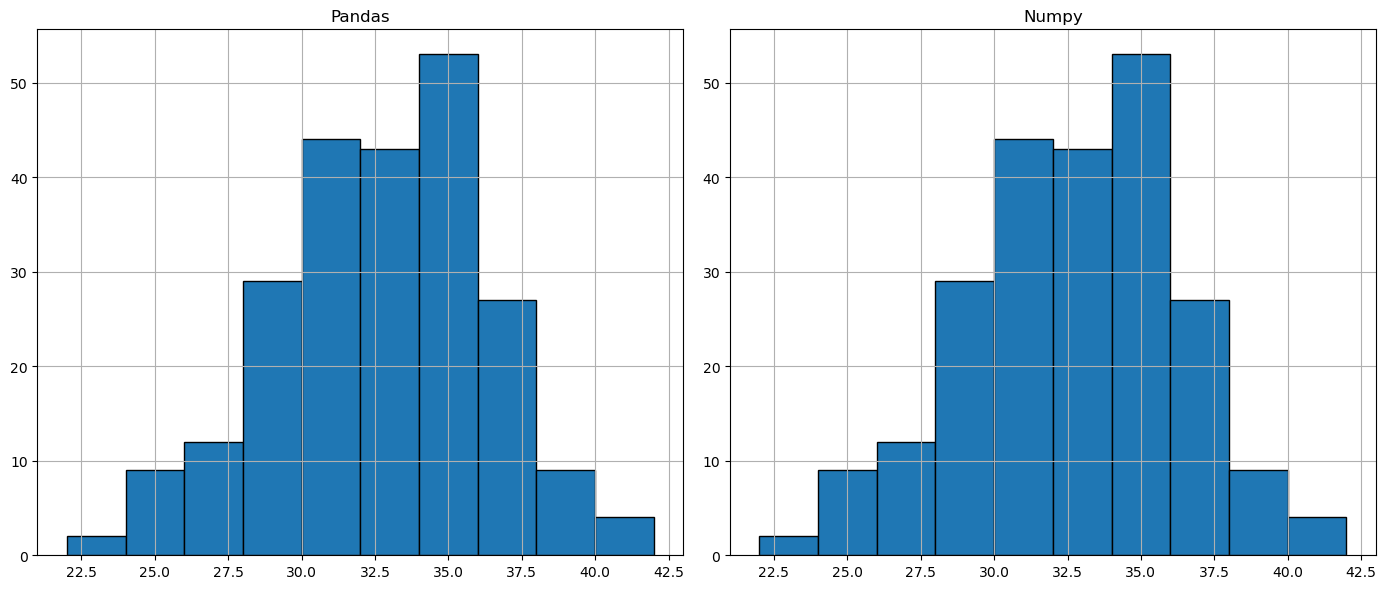

In [9]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].hist(pd_df()['Temperature'], bins=10, edgecolor='black')
axes[0].set_title('Pandas')
axes[0].grid(True)

axes[1].hist(np_df()[:,3], bins=10, edgecolor='black')
axes[1].set_title('Numpy')
axes[1].grid(True)

plt.tight_layout()
plt.show()

<h4>4. Збудувати графік залежності одного integer/real атрибута від іншого.</h4>

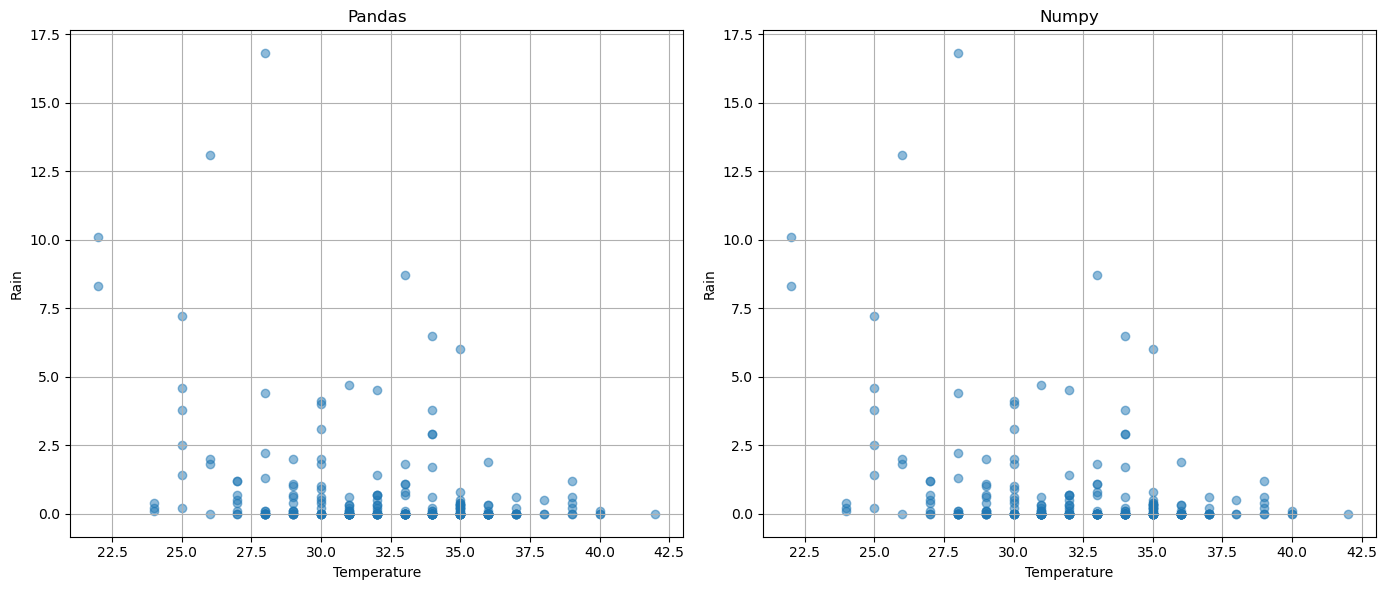

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].scatter(pd_df()['Temperature'], pd_df()['Rain'], alpha=0.5)
axes[0].set_title('Pandas')
axes[0].set_xlabel('Temperature')
axes[0].set_ylabel('Rain')
axes[0].grid(True)

axes[1].scatter(np_df()[:,3], np_df()[:,6], alpha=0.5)
axes[1].set_title('Numpy')
axes[1].set_xlabel('Temperature')
axes[1].set_ylabel('Rain')
axes[1].grid(True)

plt.tight_layout()
plt.show()


<h4>5. Підрахувати коефіцієнт Пірсона та Спірмена для двох integer/real атрибутів.</h4>

In [11]:
from scipy.stats import pearsonr, spearmanr

pearson_corr_pd, _ = pearsonr(pd_df()['Temperature'], pd_df()['Rain'])
spearman_corr_pd, _ = spearmanr(pd_df()['Temperature'], pd_df()['Rain'])

pearson_corr_np, _ = pearsonr(np_df()[:,3], np_df()[:,6])
spearman_corr_np, _ = spearmanr(np_df()[:,3], np_df()[:,6])

print("Коефіцієнт Пірсона (Pandas):", pearson_corr_pd)
print("Коефіцієнт Пірсона (Numpy):", pearson_corr_np, '\n')

print("Коефіцієнт Спірмена (Pandas):", spearman_corr_pd)
print("Коефіцієнт Спірмена (Numpy):", spearman_corr_np)

Коефіцієнт Пірсона (Pandas): -0.31534087725648363
Коефіцієнт Пірсона (Numpy): -0.31534087725648363 

Коефіцієнт Спірмена (Pandas): -0.27089498932613804
Коефіцієнт Спірмена (Numpy): -0.27089498932613804


<h4>6. Провести One Hot Encoding категоріального string атрибуту.</h4>

In [12]:
from sklearn.preprocessing import OneHotEncoder

df_pd = pd_df()
categorical_column = df_pd['Classes']
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(categorical_column.values.reshape(-1, 1))
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(['Classes']))
df_pd_encoded = pd.concat([df_pd, encoded_df], axis=1)

df_np = np_df()
classes = df_np[:,13]
unique_classes = np.unique(classes)
one_hot_encoded = np.zeros((len(classes), len(unique_classes)))
class_to_index = {class_label: i for i, class_label in enumerate(unique_classes)}
for i, class_label in enumerate(classes):
    one_hot_encoded[i, class_to_index[class_label]] = 1
df_np = np.hstack((df_np, one_hot_encoded ))

print(df_pd_encoded.head())
#print(df_np[:5])

   Day  Month    Year  Temperature    RH    Ws  Rain  FFMC  DMC    DC  ISI  \
0  1.0    6.0  2012.0         29.0  57.0  18.0   0.0  65.7  3.4   7.6  1.3   
2  3.0    6.0  2012.0         26.0  82.0  22.0  13.1  47.1  2.5   7.1  0.3   
3  4.0    6.0  2012.0         25.0  89.0  13.0   2.5  28.6  1.3   6.9  0.0   
4  5.0    6.0  2012.0         27.0  77.0  16.0   0.0  64.8  3.0  14.2  1.2   
5  6.0    6.0  2012.0         31.0  67.0  14.0   0.0  82.6  5.8  22.2  3.1   

   BUI  FWI   Classes  Classes_fire  Classes_not fire  
0  3.4  0.5  not fire           0.0               1.0  
2  2.7  0.1  not fire           0.0               1.0  
3  1.7  0.0  not fire           0.0               1.0  
4  3.9  0.5  not fire           1.0               0.0  
5  7.0  2.5      fire           1.0               0.0  


<h4>7. Провести візуалізацію багатовимірних даних.</h4>

c:\Users\fidje\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\fidje\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\fidje\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\fidje\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

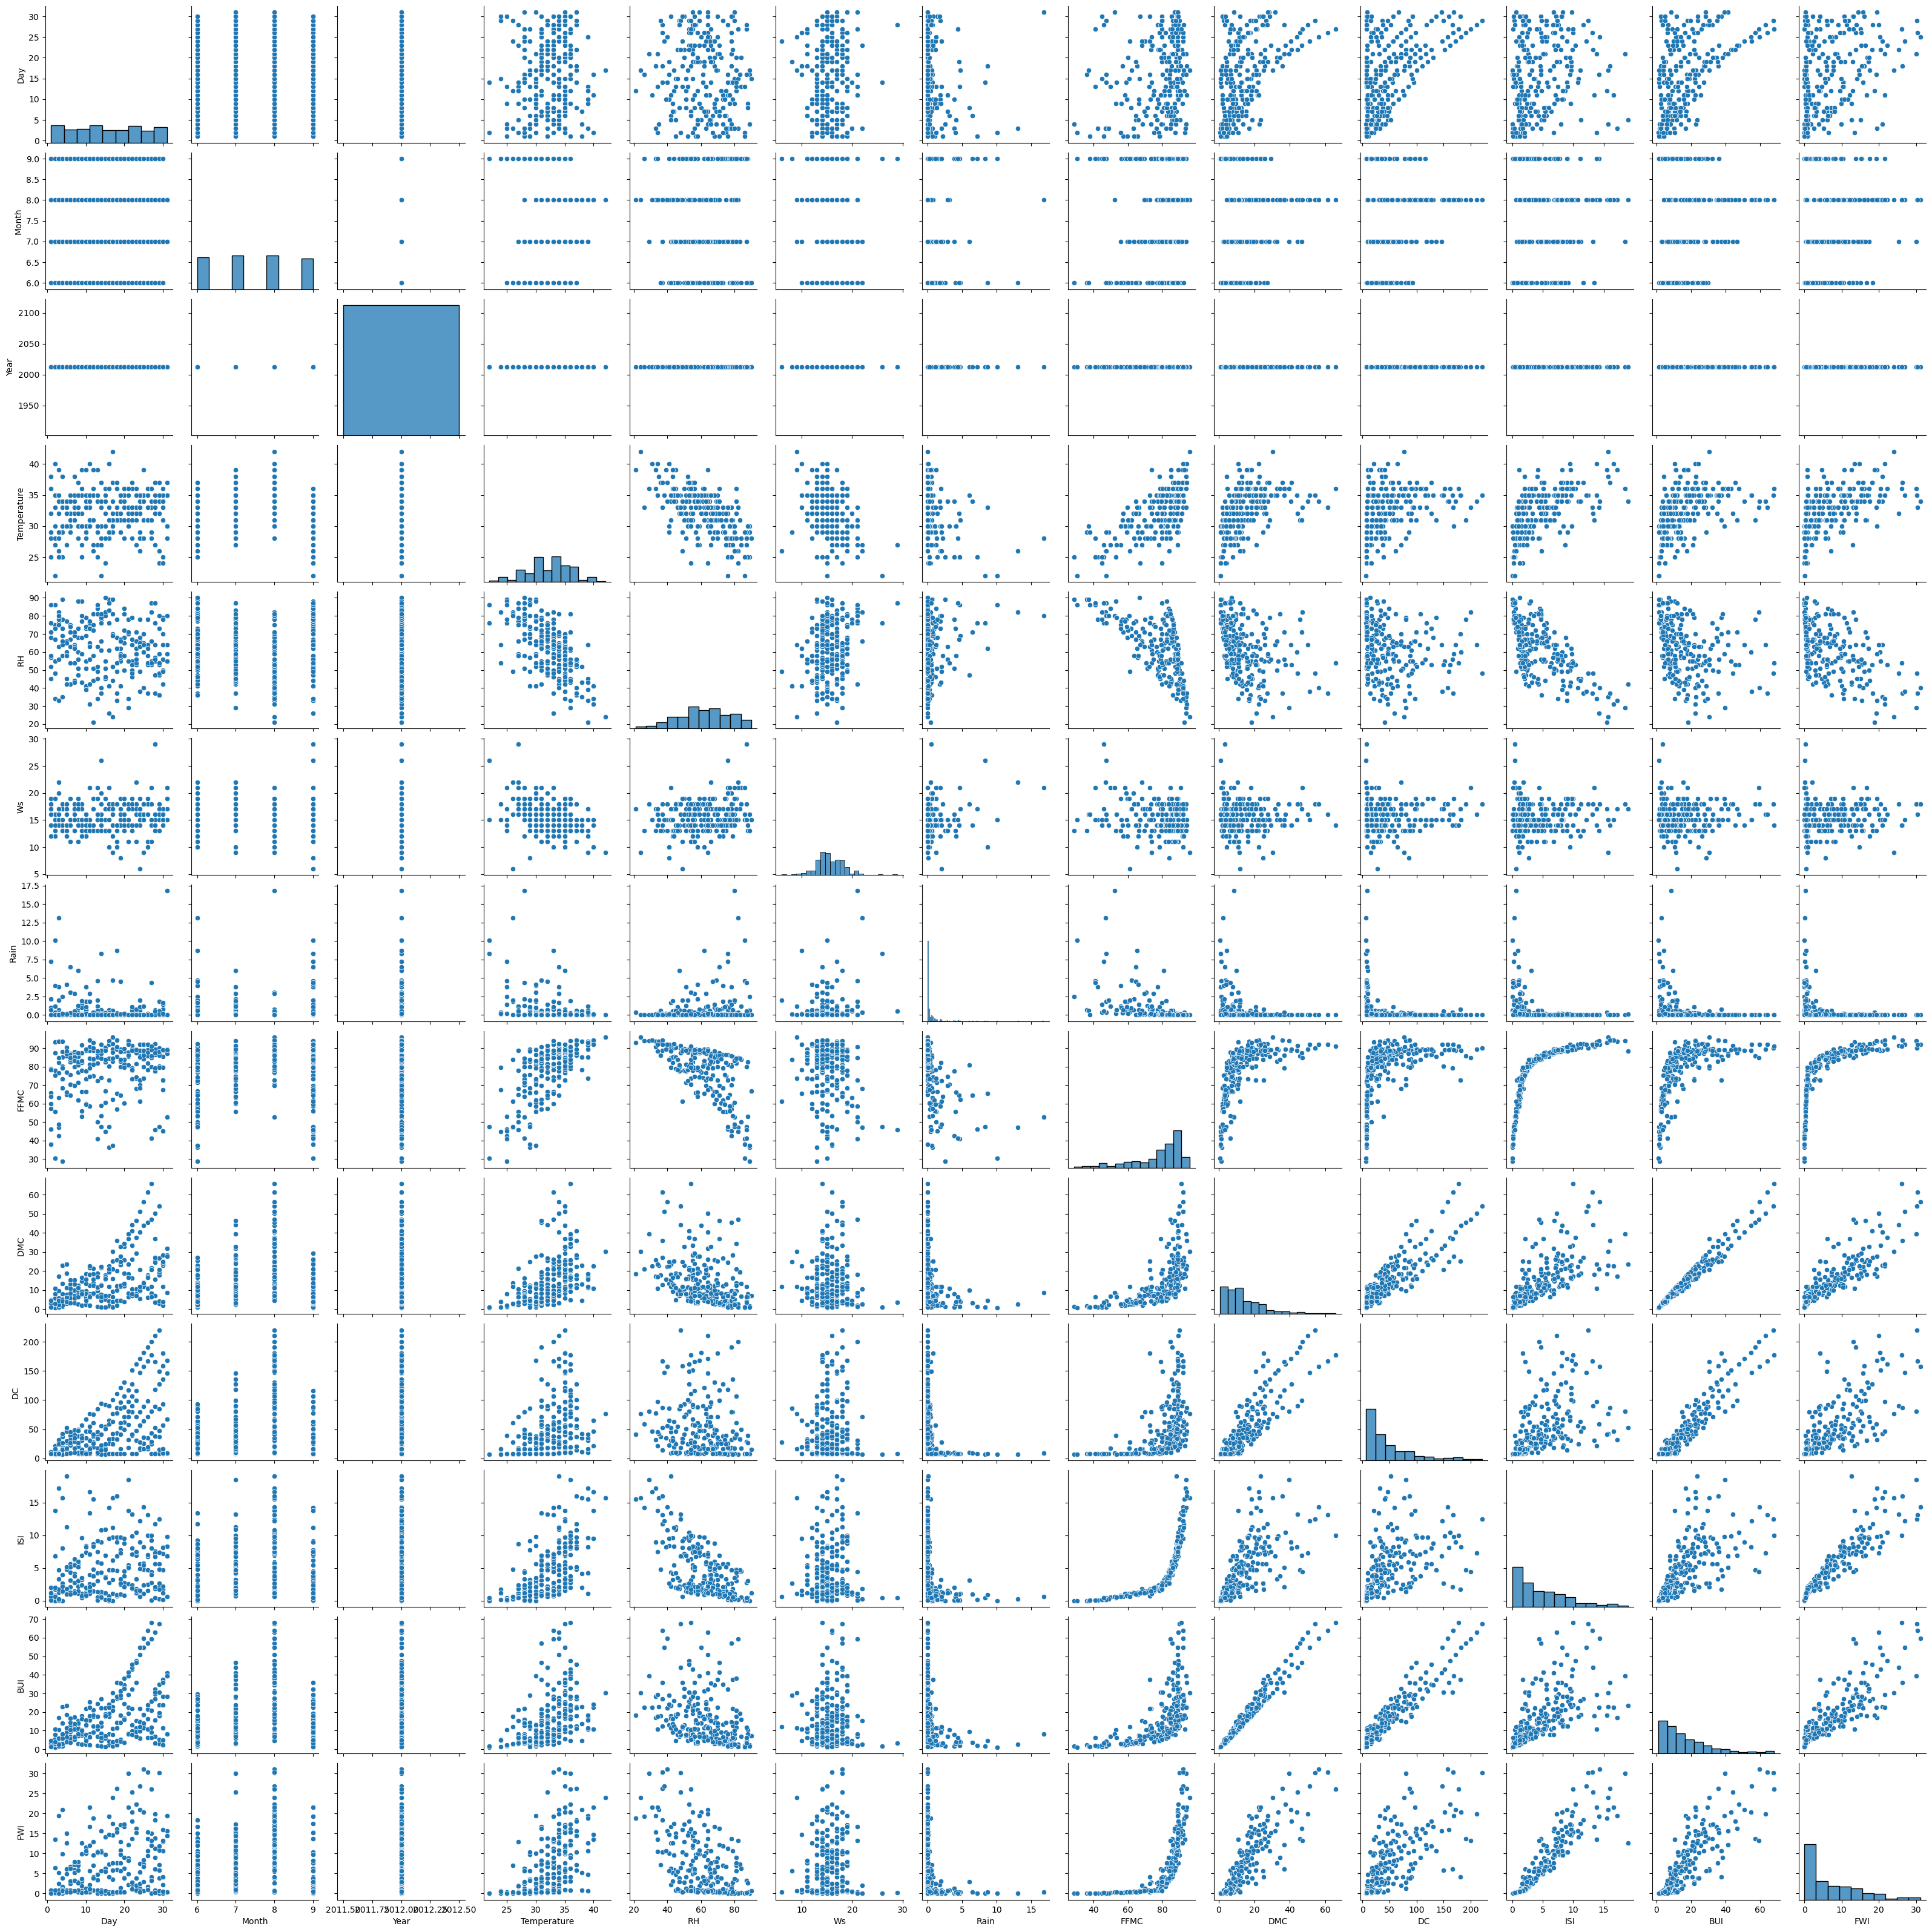

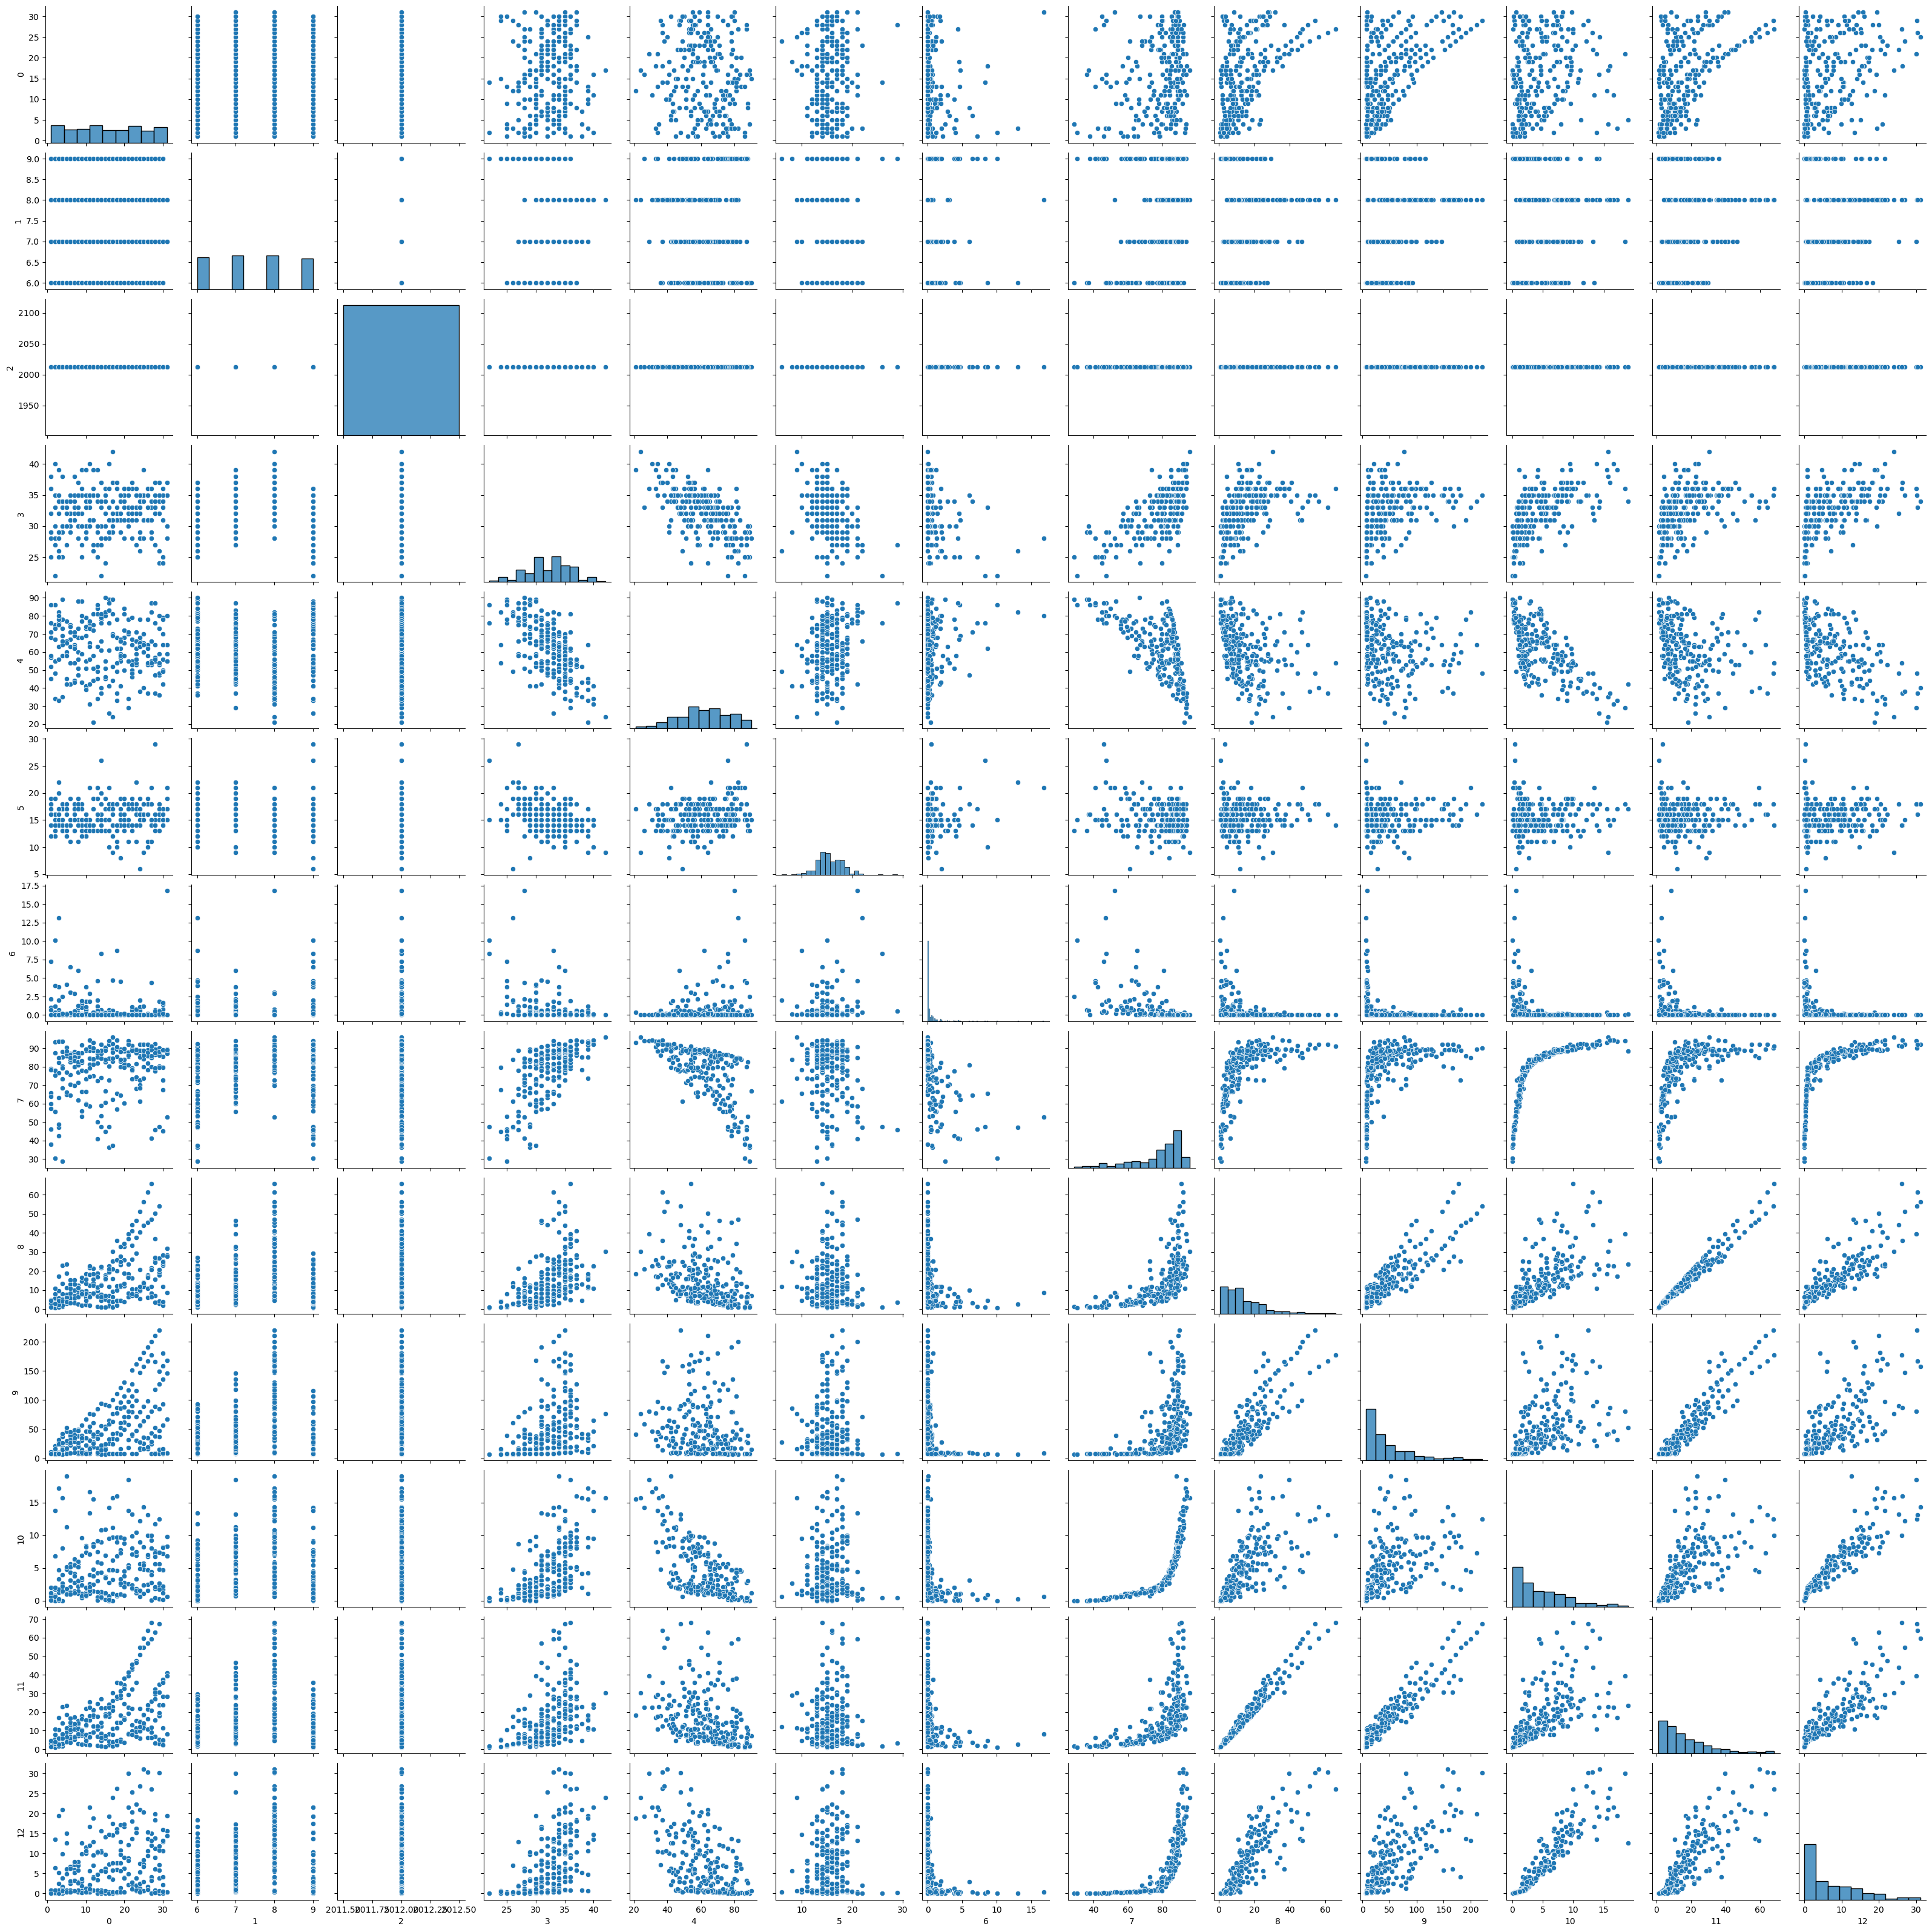

In [13]:
import seaborn as sns

df_pd = pd_df()
sns.pairplot(df_pd)

df_np = np_df()
df_np = pd.DataFrame(df_np)
sns.pairplot(df_np)
